In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [14]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with 300 samples, 3 centers, and a standard deviation of 0.6
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# Initialize a StandardScaler to normalize the data
scaler = StandardScaler()

# Scale the data to have zero mean and unit variance
X_scaled = scaler.fit_transform(X)

# Print the first 5 rows of the scaled data
print(X_scaled[0:5])

[[-1.1556965  -1.33355203]
 [-1.20564162 -1.29101262]
 [-0.0889342   1.05445939]
 [ 1.26537302  0.19363283]
 [-1.35230803 -1.34801943]]


In [ ]:
# Initialize the KMeans clustering model with 3 clusters, 'k-means++' initialization, 10 iterations, and a fixed random state for reproducibility
Kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# Fit the KMeans model to the scaled data
Kmeans.fit(X_scaled)

# Retrieve the cluster labels assigned to each data point
labels = Kmeans.labels_

# Retrieve the coordinates of the cluster centroids
centroids = Kmeans.cluster_centers_

# Calculate the within-cluster sum of squares (WCSS) to measure clustering performance
wcss = Kmeans.inertia_

# Print the cluster labels, centroids, and WCSS
print('Labels: ', labels)
print('Centroids: ', centroids)
print('WCSS: ', wcss)

Labels;  [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
Centroids;  [[-0.20681666  1.1687533 ]
 [-1.09901854 -1.26535113]
 [ 1.30583519  0.09659783]]
WCSS;  6.775066760799562


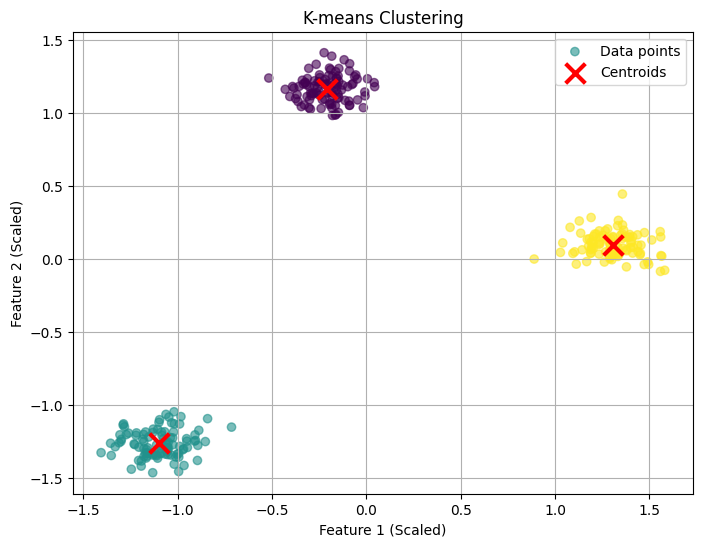

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(8,6))

# Scatter plot of the scaled data points, colored by their cluster labels
plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6, label='Data points')

# Scatter plot of the cluster centroids, marked with red 'x'
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, linewidths=3, label='Centroids')

# Add a title to the plot
plt.title('K-means Clustering')

# Label the x-axis and y-axis
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')

# Add a legend to the plot
plt.legend()

# Add a grid to the plot for better readability
plt.grid(True)

# Save the plot as an image file
plt.savefig('Kmeans-cluster.png')

# Display the plot
plt.show()

In [21]:
wcss_values = []

k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

print("The WCSS values are: ", wcss_values)    

The WCSS values are:  [600.0, 178.6567161469548, 6.775066760799562, 5.728614673478414, 4.707298694840953, 3.9544520546837707, 3.506640605600307, 3.1018183843955005, 2.740245954041301, 2.507097456538774]


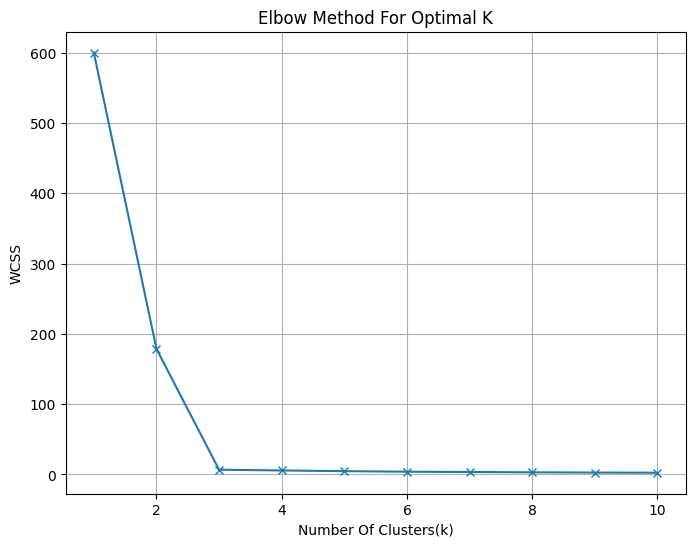

In [19]:
plt.figure(figsize=(8,6))
plt.plot(k_values, wcss_values, marker='x')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number Of Clusters(k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig('elbow_plot.png')
plt.show()